In [324]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import ElasticNet, LassoCV ,Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import scipy.stats as stats
import lightgbm as lbm
from sklearn import preprocessing
import matplotlib
import seaborn as sns
from sklearn import utils 
from matplotlib import pyplot as plt
%matplotlib inline

In [376]:
#считываем данные
train_df = pd.read_csv('../../datasets/train_house_price.csv')
test_df = pd.read_csv('../../datasets/test_house_price.csv')


## 1.Первичный анализ признаков

In [377]:
pd.set_option('display.max_columns', None) 

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [378]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [379]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [380]:
test_ides = test_df['Id'].copy()

In [381]:
all_data = pd.concat([train_df, test_df])
all_data['SalePrice'] = all_data['SalePrice'].fillna(-1)

all_data.drop('Id',axis=1,inplace=True)

<AxesSubplot:>

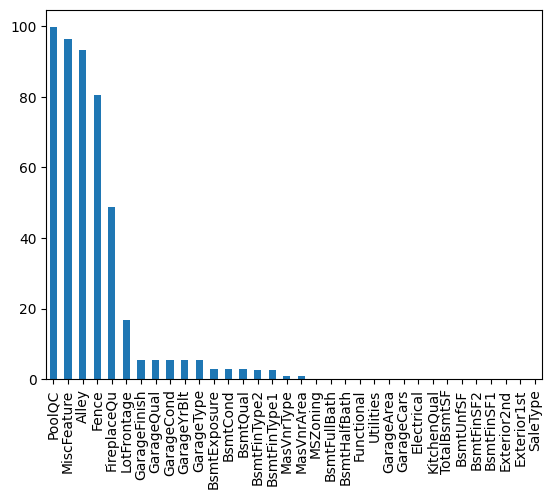

In [382]:
#посмотрим как распределяются пропущенные значения 

miss_all_data = all_data.isna().sum()[all_data.isna().sum() != 0].sort_values(ascending = False)/len(all_data)*100
miss_all_data.plot.bar()

In [383]:
# удаляем признаки которые имеют >= 80% пропусков

all_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
test_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

all_data.shape

(2919, 76)

In [384]:
#MSSubClass, OverallQual, OverallCond это категориальнst переменные по условию 
#превратим их в строчный формат для исключения бессмысленных арифметических операций 

pd.unique(all_data['MSSubClass']), pd.unique(all_data['OverallQual']), pd.unique(all_data['OverallCond'])

(array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
        180,  40, 150]),
 array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2]),
 array([5, 8, 6, 7, 4, 2, 3, 9, 1]))

In [385]:

def make_str_ctg(df,list_features):
    df = df.copy()
    for feature in list_features:
        for num in pd.unique(df[feature]):
            df.loc[df[feature] == num, feature] = f'{feature}_{num}'
    return df

all_data = make_str_ctg(all_data,['MSSubClass','OverallQual', 'OverallCond'])


In [386]:
pd.unique(all_data['MSSubClass']), '\n',pd.unique(all_data['OverallQual']), '\n',pd.unique(all_data['OverallCond'])

(array(['MSSubClass_60', 'MSSubClass_20', 'MSSubClass_70', 'MSSubClass_50',
        'MSSubClass_190', 'MSSubClass_45', 'MSSubClass_90',
        'MSSubClass_120', 'MSSubClass_30', 'MSSubClass_85',
        'MSSubClass_80', 'MSSubClass_160', 'MSSubClass_75',
        'MSSubClass_180', 'MSSubClass_40', 'MSSubClass_150'], dtype=object),
 '\n',
 array(['OverallQual_7', 'OverallQual_6', 'OverallQual_8', 'OverallQual_5',
        'OverallQual_9', 'OverallQual_4', 'OverallQual_10',
        'OverallQual_3', 'OverallQual_1', 'OverallQual_2'], dtype=object),
 '\n',
 array(['OverallCond_5', 'OverallCond_8', 'OverallCond_6', 'OverallCond_7',
        'OverallCond_4', 'OverallCond_2', 'OverallCond_3', 'OverallCond_9',
        'OverallCond_1'], dtype=object))

In [387]:
pd.unique(all_data.dtypes)

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [388]:

numeric_features = [i for i in all_data.columns if all_data[i].dtype != 'O']
categorical_features = [i for i in all_data.columns if all_data[i].dtype == 'O']

print(f'{len(numeric_features)} numeric features \n{len(categorical_features)} categorical features')

34 numeric features 
42 categorical features


In [389]:
#заполним оставшиеся пропуски 

def impute_miss(df):
    df = df.copy()
    
    for num_col in numeric_features:
        df[num_col] = df[num_col].fillna(df[num_col].median())
    
    for cat_col in categorical_features:
        df[cat_col] = df[cat_col].fillna('None')
    
    return df

all_data = impute_miss(all_data)

all_data.isna().sum().sum()

0

#### проверим распределения признаков на нормальность

In [390]:

is_normal_features = {}

for col in numeric_features:
    is_normal_features[col] = not stats.shapiro(all_data.loc[:,'LotArea'])[1] < 0.01

In [391]:
# список признаков которые нормально распределены 
[feature for feature in is_normal_features.keys() if is_normal_features[feature] == True]

[]

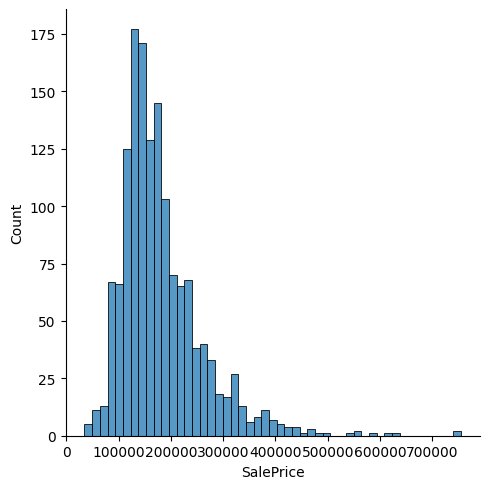

In [406]:
#распределение целевой переменной 
y = all_data.loc[all_data['SalePrice'] > 0,'SalePrice']
sns.displot(y)

####    вывод: ни один из признаков не распределен нормально, целевая переменная также имеет явно выраженную ассиметрию 
                               

#### посмотрим на корреляцию признаков

<AxesSubplot:>

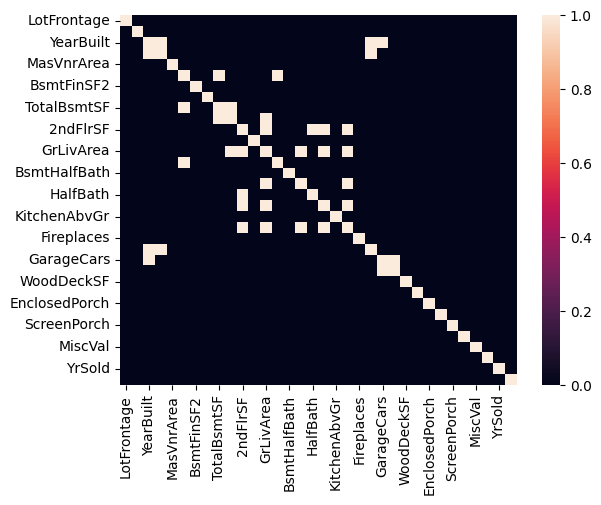

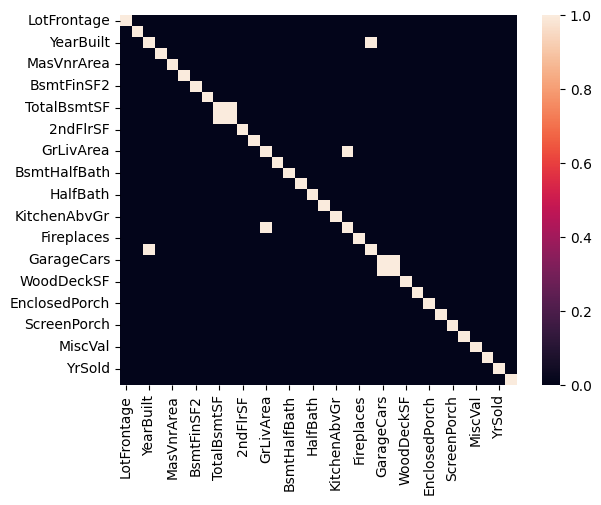

In [392]:
#построим тепловую карту сразу с порогом

plt.figure()
sns.heatmap(all_data.corr() >= 0.5)
plt.figure()
sns.heatmap(all_data.corr() >= 0.7)

In [407]:

def correl(X_train, thresh):
    cor = X_train.corr()
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    all_cor = c1[c1.values != 1]
    return all_cor[abs(all_cor) > thresh]

correl(all_data,0.5)

GarageCars    GarageArea      0.889689
TotRmsAbvGrd  GrLivArea       0.808354
TotalBsmtSF   1stFlrSF        0.801638
GarageYrBlt   YearBuilt       0.788253
TotRmsAbvGrd  BedroomAbvGr    0.669737
2ndFlrSF      GrLivArea       0.655085
BsmtFinSF1    BsmtFullBath    0.638911
GrLivArea     FullBath        0.630286
GarageYrBlt   YearRemodAdd    0.626341
YearBuilt     YearRemodAdd    0.612235
2ndFlrSF      HalfBath        0.611362
TotRmsAbvGrd  2ndFlrSF        0.584586
1stFlrSF      GrLivArea       0.562538
GarageCars    YearBuilt       0.537663
BsmtFinSF1    TotalBsmtSF     0.536471
FullBath      TotRmsAbvGrd    0.527337
GrLivArea     BedroomAbvGr    0.517058
BedroomAbvGr  2ndFlrSF        0.503506
dtype: float64

#### вывод: в данных присутвует мультиколлинеарность признаков 

### Итог: 
#### -признаки распределены не нормально
#### -целевая переменная распределена не нормально нужно ее логарифмировать
#### -в данных есть мультиколлинеарность 

## 2.Предобработка данных 

In [424]:
all_data['GarageArea']

0       548.0
1       460.0
2       608.0
3       642.0
4       836.0
        ...  
1454      0.0
1455    286.0
1456    576.0
1457      0.0
1458    650.0
Name: GarageArea, Length: 2919, dtype: float64

In [394]:
#переменные коррелирующие с целевой переменной 

#corr_columns = np.abs(all_data.corr() > 0.5)['SalePrice'][np.abs(all_data.corr() > 0.5)['SalePrice']]
#corr_columns

In [ ]:
#x`corr_features = [i for i in corr_columns.index if i != 'SalePrice']

#for f in corr_features:
#    plt.figure(figsize=(3,3))
#    sns.scatterplot(x=all_data[f],y=all_data['SalePrice'])

In [10]:
#столбец OverallQual коррелирует с целевой переменной более чем на 75%

(np.abs(all_data.corr()) > 0.75)['SalePrice'][np.abs(all_data.corr() > 0.75)['SalePrice']]

OverallQual    True
SalePrice      True
Name: SalePrice, dtype: bool

In [11]:
all_data[corr_features].dtypes

OverallQual     int64
YearBuilt       int64
YearRemodAdd    int64
TotalBsmtSF     int64
1stFlrSF        int64
GrLivArea       int64
FullBath        int64
TotRmsAbvGrd    int64
GarageCars      int64
GarageArea      int64
dtype: object

In [12]:
# Удаляем поля где пропусков почти 100%
all_data.drop(['PoolQC', 'MiscFeature', 'Alley','Fence'], axis=1, inplace=True)
test_df.drop(['PoolQC', 'MiscFeature', 'Alley','Fence'], axis=1, inplace=True)


In [13]:
#заполняем пропущеные значения 
def impute_miss(df):
    for col in df.columns:
        if (df[col].dtype == 'float64') or (df[col].dtype == 'int64'):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna('None1')
           
    return df

all_data = impute_miss(all_data)    
test_df = impute_miss(test_df)

In [14]:
#выделим коррелирующие факторы отдельно 
corr_train_data = all_data[corr_features].copy()
corr_test_data = test_df[corr_features].copy()

cols = corr_features + ['Id']

all_data.drop(cols, axis=1,inplace=True)
test_df.drop(corr_features, axis=1,inplace=True)

In [15]:
all_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,854,0,1,0,1,3,1,Gd,Typ,0,None1,Attchd,2003.0,RFn,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,0,0,0,1,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,866,0,1,0,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,756,0,1,0,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,1053,0,1,0,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
test_df.shape, all_data.shape

((1459, 65), (1460, 66))

In [17]:
all_data['SalePrice'] = np.log1p(all_data['SalePrice'])


<AxesSubplot:>

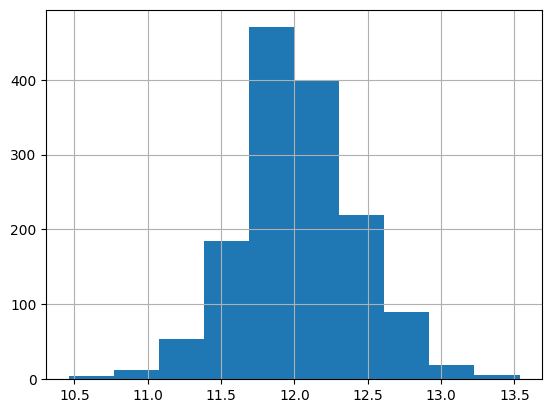

In [18]:
all_data['SalePrice'].hist()

In [19]:
y = all_data['SalePrice']
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [20]:
all_data.shape, test_df.shape

((1460, 65), (1459, 65))

In [21]:
#кодируем кaтегриальные признаки 
all_data = pd.get_dummies(all_data,drop_first=True)
test_df = pd.get_dummies(test_df,drop_first=True)

In [22]:
all_data.shape, test_df.shape

((1460, 238), (1459, 228))

In [23]:
def pca(df):
    df = df.copy()
    pca = PCA(random_state=17, n_components=0.997)
    return pca.fit_transform(df)

def pca_test(df):
    df = df.copy()
    pca = PCA(random_state=17, n_components=0.99)
    return pca.fit_transform(df)

In [24]:
all_data = pd.DataFrame(pca(all_data))
test_df = pd.DataFrame(pca_test(test_df))

In [25]:
all_data.shape,test_df.shape

((1460, 4), (1459, 4))

In [26]:
corr_train_data = corr_train_data.reset_index()
corr_test_data = corr_test_data.reset_index()

In [27]:
all_data = all_data.reset_index()
test_df = test_df.reset_index()

In [28]:
corr_train_data.head()

,index,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,0,7,2003,2003,856,856,1710,2,8,2,548
1,1,6,1976,1976,1262,1262,1262,2,6,2,460
2,2,7,2001,2002,920,920,1786,2,6,2,608
3,3,7,1915,1970,756,961,1717,1,7,3,642
4,4,8,2000,2000,1145,1145,2198,2,9,3,836


In [29]:
all_data.head()

,index,0,1,2,3
0,0,-2063.147412,381.674187,-9.217119,611.143040
1,1,-912.194285,643.564806,-87.864603,-250.062038
2,2,734.450480,11.819213,-6.179991,536.267935
3,3,-968.704432,-224.130819,2.366533,395.123825
4,4,3747.141583,45.479659,-9.117131,714.782872


In [30]:
all_data = all_data.merge(corr_train_data, how='outer')
test_df = test_df.merge(corr_test_data, how='outer')

all_data.rename(columns={i : f'col{i}' for i in all_data.columns[1:]},inplace=True)
test_df.rename(columns={i : f'col{i}' for i in test_df.columns[1:]},inplace=True)

X = all_data
X.shape, test_df.shape

((1460, 15), (1459, 15))

In [31]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [449]:
xgb = XGBRegressor(n_estimators=750, learning_rate=0.011, max_depth=11, subsample=0.2)

bagg_regressor = BaggingRegressor(xgb, n_estimators=50,random_state=17)

In [450]:
bagg_regressor.fit(X,y)

BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.011, max_bin=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None, max_depth=11,
                                             max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=750, n_jobs=None,
                                             num_parallel_tree=None,
                                             predictor=None, random_state=None,
                                             reg_alpha=None, reg_lambda=None, ...),
                 n_estimators=50, random_state=17)

In [451]:
outputs = pd.DataFrame({'Id':Id,'SalePrice':bagg_regressor.predict(test_df)})

In [452]:
outputs

,Id,SalePrice
0,1461,11.727517
1,1462,11.822980
2,1463,12.088511
3,1464,12.103138
4,1465,12.116604
...,...,...
1454,2915,11.195395
1455,2916,11.331036
1456,2917,11.983955
1457,2918,11.614893


In [45]:
al = [0.1, 0.01, 0.001, 0.0001, 1e-15, 1e-10, 1e-08, 0.0009, 0.0007,
                0.0005, 0.0003, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50,
                75, 100, 0.001, 0.0005, 0.007]

lasso =LassoCV(alphas=al, cv=20, random_state=1)


lasso.fit(X,y)

/home/vlad/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.901467774504892, tolerance: 0.022003525244621354
  model = cd_fast.enet_coordinate_descent_gram(
/home/vlad/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.43633022164429036, tolerance: 0.022003525244621354
  model = cd_fast.enet_coordinate_descent_gram(
/home/vlad/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.266831755237156, tolerance: 0.022003525244621354
  model = cd_fast.enet_coordinate_descent_gram(
/home/vlad/.local/lib/python3.10/site-packages/sklearn/linear_model/_

LassoCV(alphas=[0.1, 0.01, 0.001, 0.0001, 1e-15, 1e-10, 1e-08, 0.0009, 0.0007,
                0.0005, 0.0003, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50,
                75, 100, 0.001, 0.0005, 0.007],
        cv=20, random_state=1)

In [52]:
lasso1 = Lasso(alpha=lasso.alpha_, max_iter=50000)

lasso1.fit(X,y)

baggin_lasso = BaggingRegressor(lasso1, n_estimators=100,random_state=1)
baggin_lasso.fit(X,y)
outputs = pd.DataFrame({'Id':Id,'SalePrice':np.exp(lasso1.predict(test_df))})
outputs

,Id,SalePrice
0,1461,116098.793208
1,1462,233940.813936
2,1463,168880.392503
3,1464,184638.310991
4,1465,201582.318969
...,...,...
1454,2915,92663.327055
1455,2916,102903.840227
1456,2917,158035.268261
1457,2918,122986.854208


In [54]:
outputs.to_csv('sub_house_price_simple_lasso.csv',index=False)

In [53]:
outputs

,Id,SalePrice
0,1461,116098.793208
1,1462,233940.813936
2,1463,168880.392503
3,1464,184638.310991
4,1465,201582.318969
...,...,...
1454,2915,92663.327055
1455,2916,102903.840227
1456,2917,158035.268261
1457,2918,122986.854208


In [389]:
grad_boost = GradientBoostingRegressor(n_estimators=5211, 
                                learning_rate=0.009636280613755809, 
                                max_depth=4, 
                                max_features='sqrt', 
                                min_samples_leaf=5, 
                                min_samples_split=9, 
                                loss='huber', 
                                random_state=1)
grad_boost.fit(X,y)

GradientBoostingRegressor(learning_rate=0.009636280613755809, loss='huber',
                          max_depth=4, max_features='sqrt', min_samples_leaf=5,
                          min_samples_split=9, n_estimators=5211,
                          random_state=1)

In [496]:
def combined_models(X):
    return ((( 0.8* xgb_regeressor.predict(X)) +
            (0.2*grad_boost.predict(X)) + 
            (0.9* forest_model.predict(X)))/2)


In [502]:
xgb_regeressor.score(X,y)

0.9966374377797128

In [503]:
predicted = combined_models(test_df)

output_f = pd.DataFrame({'Id':test_df['Id'],'SalePrice': forest_model.predict(test_df)})
output_grad = pd.DataFrame({'Id':test_df['Id'],'SalePrice': grad_boost.predict(test_df)})
output_xgb = pd.DataFrame({'Id':test_df['Id'],'SalePrice': xgb_regeressor.predict(test_df)})

/home/vlad/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BsmtExposure_None1
- BsmtFinType2_None1
- ExterQual_Gd
- Exterior1st_None1
- Exterior2nd_None1
- ...
Feature names seen at fit time, yet now missing:
- Condition2_RRAe
- Condition2_RRAn
- Condition2_RRNn
- Electrical_Mix
- Electrical_None1
- ...

  warnings.warn(message, FutureWarning)
/home/vlad/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BsmtExposure_None1
- BsmtFinType2_None1
- ExterQual_Gd
- Exterior1st_None1
- Exterior2nd_None1
- ...
Feature names seen at fit time, yet now missing:
- Condition2_RRAe
- Condition2_RRAn
- Condition2_RRNn
- Electrical_Mix
- Electrical_None1
- ...

  

In [498]:
predicted

array([137365.13604942, 156130.89147089, 165526.73900032, ...,
       168653.54128448, 137335.70323995, 174117.65023017])

In [504]:
output_f.to_csv('forest_submitions.csv', index=False)
output_grad.to_csv('grad_submitions.csv', index=False)
output_xgb.to_csv('xgb_submitions.csv', index=False)
